In [1]:
%load_ext autoreload
%autoreload 2
import os

os.chdir('..')

In [2]:
from src import *
from model.classification import *

from tqdm.notebook import tqdm
from IPython.display import HTML
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import torch.nn as nn
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import yaml
from glob import glob
from tabulate import tabulate

In [12]:
table = []
for i in range(5):
    file = f'outputs/cross_validation_5/{i}/results/tst_output.csv'
    rows = np.genfromtxt(file, delimiter=';', skip_header=1, dtype=str)
    rows = np.atleast_2d(rows)
    table.extend(rows)

print(tabulate(table, headers=['rvce', 'error', 'n_events', 'mae', 'file'], tablefmt='fancy_grid', showindex=True))

╒════╤════════╤═════════╤════════════╤═══════╤═════════════════════════════════════════════════╕
│    │   rvce │   error │   n_events │   mae │ file                                            │
╞════╪════════╪═════════╪════════════╪═══════╪═════════════════════════════════════════════════╡
│  0 │  0.026 │       6 │        232 │ 0.465 │ [0, 2069]  20190819-Kutna Hora-L14-out-MVI_0005 │
├────┼────────┼─────────┼────────────┼───────┼─────────────────────────────────────────────────┤
│  1 │  0.03  │       8 │        265 │ 0.328 │ [0, 3752]  20190819-Kutna Hora-L10-out-SDV_1888 │
├────┼────────┼─────────┼────────────┼───────┼─────────────────────────────────────────────────┤
│  2 │  0.101 │     -30 │        296 │ 0.448 │ [0, 2067]  20190819-Kutna Hora-L1-out-MVI_0007  │
├────┼────────┼─────────┼────────────┼───────┼─────────────────────────────────────────────────┤
│  3 │  0.127 │      -8 │         63 │ 0.064 │ [0, 2068]  20190819-Ricany-L9-in-MVI_0008       │
├────┼────────┼─────────┼─────

In [4]:
files

['outputs/cross_validation_5/1/results/tst_output.csv',
 'outputs/cross_validation_5/2/results/tst_output.csv',
 'outputs/cross_validation_5/0/results/tst_output.csv',
 'outputs/cross_validation_5/4/results/tst_output.csv',
 'outputs/cross_validation_5/3/results/tst_output.csv']

In [4]:
files = glob('outputs/cross_validation_25/*/results/tst_output.csv')

table = []
for file in files:
    row = np.genfromtxt(file, delimiter=';', skip_header=1, dtype=str)
    table.append(row)

print(tabulate(table, headers=['rvce', 'error', 'n_events', 'mae', 'file'], tablefmt='fancy_grid', showindex=True))

╒════╤════════╤═════════╤════════════╤═════════╤═════════════════════════════════════════════════╕
│    │   rvce │   error │   n_events │     mae │ file                                            │
╞════╪════════╪═════════╪════════════╪═════════╪═════════════════════════════════════════════════╡
│  0 │  0.059 │      -1 │         17 │   1.009 │ [0, 2048]  20190819-Kutna Hora-L6-out-MVI_0017  │
├────┼────────┼─────────┼────────────┼─────────┼─────────────────────────────────────────────────┤
│  1 │  0.104 │     -37 │        356 │  22.862 │ [0, 2051]  20190819-Ricany-L8-in-MVI_0009       │
├────┼────────┼─────────┼────────────┼─────────┼─────────────────────────────────────────────────┤
│  2 │  0.027 │      -8 │        294 │   4.602 │ [0, 2067]  20190819-Ricany-L7-out-MVI_0013      │
├────┼────────┼─────────┼────────────┼─────────┼─────────────────────────────────────────────────┤
│  3 │  0.197 │     -90 │        457 │  44.541 │ [0, 2068]  20190819-Ricany-L3-in-MVI_0006       │
├────┼────

In [6]:
with open(f'config/dataset/dataset_26.11.2021.yaml', 'r') as stream:
    dataset = yaml.safe_load(stream)

In [7]:
datapool = DataPool(dataset, 6.0, 0.75, tqdm=tqdm)

Video loading:   0%|          | 0/26 [00:00<?, ?it/s]

<module 'src.datapool' from '/home/yermaand/audio-nn/src/datapool.py'>

In [8]:
folds = 19
trn_folds = [f'config/training_files/cross_validation_28.01.2021/{i}.yaml' for i in range(folds)]
tst_folds = [f'config/testing_files/cross_validation_28.01.2021/{i}.yaml' for i in range(folds)]

fold: 0
|   rvce |   error |   n_events |    mae | file                                            |
|--------+---------+------------+--------+-------------------------------------------------|
|  0.264 |     -70 |        265 | 39.736 | [0, 3752]  20190819-Kutna Hora-L10-out-SDV_1888 |


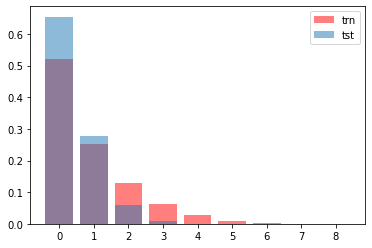

fold: 1
|   rvce |   error |   n_events |    mae | file                                      |
|--------+---------+------------+--------+-------------------------------------------|
|  0.197 |     -90 |        457 | 44.541 | [0, 2068]  20190819-Ricany-L3-in-MVI_0006 |


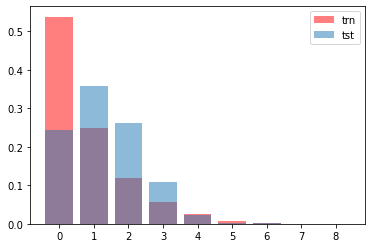

fold: 2
|   rvce |   error |   n_events |    mae | file                                           |
|--------+---------+------------+--------+------------------------------------------------|
|  0.351 |     104 |        296 | 63.177 | [0, 2067]  20190819-Kutna Hora-L1-out-MVI_0007 |


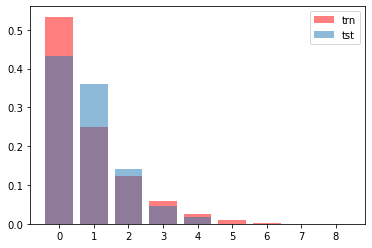

fold: 3
|   rvce |   error |   n_events |   mae | file                                      |
|--------+---------+------------+-------+-------------------------------------------|
|      0 |       0 |         63 | 2.041 | [0, 2068]  20190819-Ricany-L9-in-MVI_0008 |


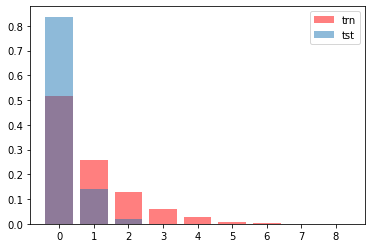

fold: 4
|   rvce |   error |   n_events |   mae | file                                            |
|--------+---------+------------+-------+-------------------------------------------------|
|   0.03 |       7 |        232 |  8.91 | [0, 2069]  20190819-Kutna Hora-L14-out-MVI_0005 |


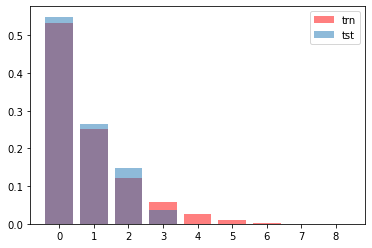

fold: 5
|   rvce |   error |   n_events |    mae | file                                           |
|--------+---------+------------+--------+------------------------------------------------|
|      4 |      32 |          8 | 13.274 | [0, 2042]  20190819-Kutna Hora-L13-in-MVI_0006 |


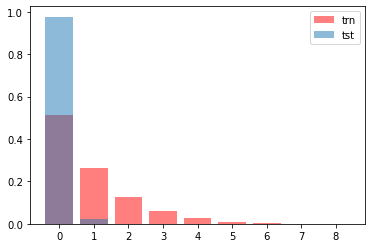

fold: 6
|   rvce |   error |   n_events |     mae | file                                           |
|--------+---------+------------+---------+------------------------------------------------|
|  0.292 |    -215 |        737 | 108.459 | [0, 2065]  20190819-Kutna Hora-L18-in-MVI_0030 |


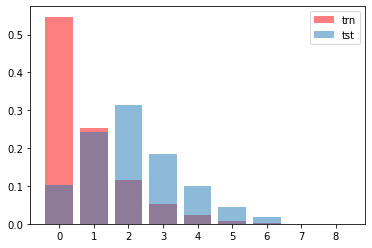

fold: 7
|   rvce |   error |   n_events |    mae | file                                          |
|--------+---------+------------+--------+-----------------------------------------------|
|  0.084 |      24 |        285 | 13.096 | [0, 2059]  20190819-Kutna Hora-L3-in-MVI_0005 |


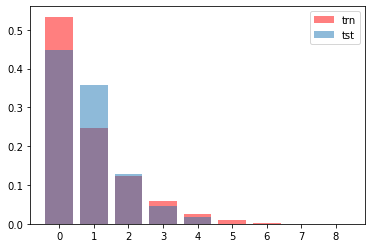

fold: 8
|   rvce |   error |   n_events |    mae | file                                       |
|--------+---------+------------+--------+--------------------------------------------|
|   0.08 |     -27 |        336 | 18.848 | [0, 2062]  20190819-Ricany-L8-out-MVI_0013 |


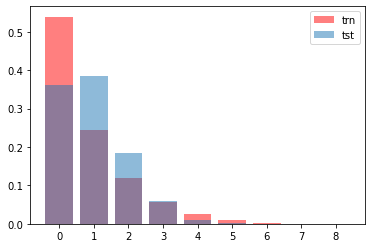

fold: 9
|   rvce |   error |   n_events |   mae | file                                           |
|--------+---------+------------+-------+------------------------------------------------|
|  0.021 |      -1 |         47 | 0.493 | [0, 2062]  20190819-Kutna Hora-L7-out-MVI_0032 |


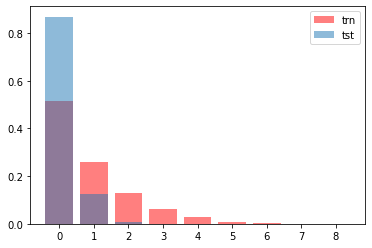

fold: 10
|   rvce |   error |   n_events |    mae | file                                           |
|--------+---------+------------+--------+------------------------------------------------|
|  0.708 |     177 |        250 | 84.267 | [0, 2065]  20190819-Kutna Hora-L3-out-MVI_0008 |


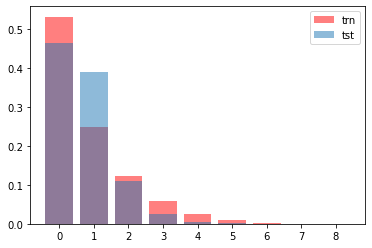

In [6]:
for fold, (trn_fold, tst_fold) in enumerate(zip(trn_folds, tst_folds)):
    print('fold:', fold)
    row = np.genfromtxt(f'outputs/cross_validation_25/{fold}/results/tst_output.csv', delimiter=';', skip_header=1, dtype=str)
    print(tabulate([row], tablefmt='orgtbl', headers=['rvce', 'error', 'n_events', 'mae', 'file']))
    
    with open(trn_fold, 'r') as stream:
        trn_files = yaml.safe_load(stream)
    with open(tst_fold, 'r') as stream:
        tst_files = yaml.safe_load(stream)
        
    fig, ax = plt.subplots()
    
    all_training_labels = []
    all_testing_labels = []
    
    for file in trn_files:
        video = datapool[file]
        events = video.get_events(True)
        
        samples, labels = create_dataset_sequentially(
            video.signal, 44100, video.events, 
            from_time=video.trn_from_time, 
            till_time=video.trn_till_time, 
            window_length=6.0)
        
        all_training_labels.extend(labels)
    
    labels1, counts = np.unique(all_training_labels, return_counts=True)
#     print(counts.sum())
    counts = counts / counts.sum()
    ax.bar(labels1, counts, align='center', alpha=0.5, label='trn', color='r')
    ax.set_xticks(labels)
    
    for file in tst_files:
        video = datapool[file]
        
        samples, labels = create_dataset_sequentially(
            video.signal, 44100, video.events, 
            window_length=6.0)
        
        all_testing_labels.extend(labels)
    
    labels2, counts = np.unique(all_testing_labels, return_counts=True)
    counts = counts / counts.sum()
    ax.bar(labels2, counts, align='center', alpha=0.5, label='tst')
    
    labels = np.union1d(labels1, labels2)
    ax.set_xticks(labels)
    plt.legend()
    plt.show()